# 1. Import and Install Dependencies

In [13]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [14]:
from platform import python_version
print(python_version())

3.9.12


# 2. Keypoints using MP Holistic

Reference: https://google.github.io/mediapipe/solutions/holistic.html

In [15]:
# Use Holistic Models for detections
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities


# Make keypoint detection, model can only detect in RGB
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB as model can only detect in RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Use Model to make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

def draw_landmarks(image, results): # draw landmarks for each image/frame
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections
    
def draw_styled_landmarks(image, results): # draw landmarks for each image/frame, fix colour of landmark drawn
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [4]:
# Open Computer Webcam using opencv
# Use computer webcam
cap = cv2.VideoCapture(0)
# Set mediapipe model 

while cap.isOpened(): #open webcam
    # Read feed
    ret, frame = cap.read()
    # Show to screen
    cv2.imshow('OpenCV Feed: Hold Q to Quit', frame)
    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'): #press q to quit
        break
cap.release() #release webcam
cv2.destroyAllWindows()

In [16]:
# use computer webcam and make keypoint detections
cap = cv2.VideoCapture(0)

# Set mediapipe model configurations
min_detection_confidence = 0.5
min_tracking_confidence= 0.5

with mp_holistic.Holistic(min_detection_confidence=min_detection_confidence, min_tracking_confidence=min_tracking_confidence) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections by calling our function
        image, results = mediapipe_detection(frame, holistic) #mediapipe_detection(image, model) 
        #print(results)
        #print(results.face_landmarks)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Show to screen
        cv2.imshow('OpenCV Feed: Hold Q to Quit', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'): #press q to quit
            break
            
    cap.release() #release webcam
    cv2.destroyAllWindows()

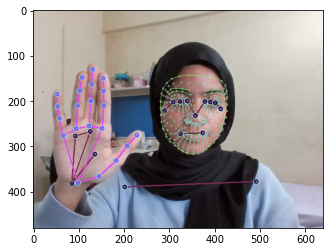

In [17]:
#show last frame with keypoints drawn using draw styled landmarks
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

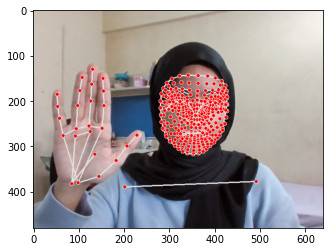

In [18]:
# call helper function to draw landmarks
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values to be used for our model training

In [19]:
#Show length of landmarks x,y,z spatial coordinates for right hand pose
len(results.right_hand_landmarks.landmark)

21

In [20]:
# Show Results of landmark x,y,z spatial coordinates for face landmarks
print('Length of face landmarks:',len(results.face_landmarks.landmark))
print('Results Type:',type(results.face_landmarks))
print('Face landmarks Results:',results.face_landmarks)

# Convert facelandmarks to numpy array
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark])if results.face_landmarks else np.zeros(468*3)
print(face)

Length of face landmarks: 468
Results Type: <class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList'>
Face landmarks Results: landmark {
  x: 0.56006217
  y: 0.5608663
  z: -0.023777343
}
landmark {
  x: 0.5653637
  y: 0.5180712
  z: -0.054602746
}
landmark {
  x: 0.5625046
  y: 0.53034544
  z: -0.02648502
}
landmark {
  x: 0.556689
  y: 0.4686621
  z: -0.046108026
}
landmark {
  x: 0.5662215
  y: 0.5032682
  z: -0.059367668
}
landmark {
  x: 0.56645894
  y: 0.48341227
  z: -0.057070207
}
landmark {
  x: 0.56610864
  y: 0.4351017
  z: -0.033789463
}
landmark {
  x: 0.48616078
  y: 0.4248526
  z: 0.00012482333
}
landmark {
  x: 0.56702465
  y: 0.39351842
  z: -0.03017501
}
landmark {
  x: 0.5679703
  y: 0.37233973
  z: -0.034493383
}
landmark {
  x: 0.56974053
  y: 0.30016643
  z: -0.032323807
}
landmark {
  x: 0.55948645
  y: 0.56787515
  z: -0.02158559
}
landmark {
  x: 0.55880576
  y: 0.5729804
  z: -0.0175193
}
landmark {
  x: 0.5582436
  y: 0.5745822
  z: -0.0125028

In [21]:
# Show Pose Connection Results
print('Pose Connection Results:',mp_holistic.POSE_CONNECTIONS)

# Get the landmarks x,y,z coordinates
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
print(pose)

Pose Connection Results: frozenset({(15, 21), (16, 20), (18, 20), (3, 7), (14, 16), (23, 25), (28, 30), (11, 23), (27, 31), (6, 8), (15, 17), (24, 26), (16, 22), (4, 5), (5, 6), (29, 31), (12, 24), (23, 24), (0, 1), (9, 10), (1, 2), (0, 4), (11, 13), (30, 32), (28, 32), (15, 19), (16, 18), (25, 27), (26, 28), (12, 14), (17, 19), (2, 3), (11, 12), (27, 29), (13, 15)})
[array([ 0.55961758,  0.48514882, -1.24910998,  0.99989325]), array([ 0.59363794,  0.41920722, -1.16354871,  0.99978703]), array([ 0.61095965,  0.4220084 , -1.16389465,  0.99968773]), array([ 0.62828881,  0.42546988, -1.16384721,  0.99965155]), array([ 0.53135967,  0.41727155, -1.16790307,  0.99982625]), array([ 0.50707245,  0.4191418 , -1.16749299,  0.99984175]), array([ 0.48355475,  0.42241219, -1.16795278,  0.99986702]), array([ 0.64742672,  0.45360991, -0.58788913,  0.99960482]), array([ 0.45395127,  0.46064249, -0.59368646,  0.99988282]), array([ 0.58553869,  0.56311435, -1.03565621,  0.99985266]), array([ 0.50797862,

In [22]:
# Using list comprehension to extract landmark results if landmark for body part is detected, else replace it with a blank array of zeros of the same shape for each body part    
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [23]:
print(pose.shape)
print(face.shape)
print(lh.shape)
print(rh.shape)

(132,)
(1404,)
(63,)
(63,)


In [24]:
# Define extract keypoint function and convert to numpy array to be saved
# Exculde face keypoints
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    #return np.concatenate([pose, face, lh, rh]) # concatenate all the keypoints that are flattened
    return np.concatenate([pose, lh, rh])

result_test = extract_keypoints(results)

In [25]:
extract_keypoints(results).shape

(258,)

In [15]:
# Total number of coordinates in results (pose, left hand and right hand)
33*4 + 21*3 + 21*3

258

In [27]:
result_test = extract_keypoints(results)
len(result_test)

258

In [28]:
np.save('testing_version2training', result_test)

# 4. Setup Folders for Collection of Keypoints for training LSTM model

In [25]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['no', 'please', 'thanks', 'welcome', 'yes', 'noaction'])

# 60 videos worth of data
no_sequences = 60

# Videos are going to be 30 frames in length if picture sequence_length = 1
sequence_length = 30

In [26]:
#create 1 folder for 1 action

for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [27]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [24]:
#Capture Video using webcam
cap = cv2.VideoCapture(0)
# Set mediapipe model 
count = 0
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences): #range(30,60) # 30....59
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
                # Read feed
                ret, frame = cap.read()
                
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                
                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic # Implement Collection Breaks between each sequence to allow me to reset and reposition to collect the action from start to finish
                if frame_num == 0: #If frame is 0, take a break
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000) #wait for 0.5 seconds
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))

                # save keypoints to folder
                np.save(npy_path, keypoints)
                cv2.imwrite(f'test/{count}.jpg', image)
                count+=1
                
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()